In [53]:
#import
import numpy as np
import pandas as pd 
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import sys
import time
import keras as keras
import tensorflow as tf
import re #regular expressions
import PIL
from PIL import Image
import exif #API to extract metadata
from geopy.geocoders import Nominatim #geolocation services
from exif import Image as im
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import wikipedia #use wikipedia api
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Input, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.layers import Lambda
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers import Dropout, Activation, BatchNormalization
from keras.layers import Normalization
print('setup successful!')

setup successful!


In [3]:
# keep the image size constant.
IMAGE_WIDTH = 224    
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 #RGB, so only 3

# Dictionary to save classes
categories = {0: 'paper',  1: 'plastic', 2: 'metal', 3: 'trash',
              4: 'shoes', 5: 'clothes', 6: 'glass',
              7: 'biological', 8: 'general'}

In [4]:
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []
base_path = "C:/Users/aakas/Desktop/garbage_classification"
for category in categories:
    filenames = os.listdir(base_path + "/"+ categories[category])
    filenames_list = filenames_list  +filenames
    categories_list = categories_list + [category] * len(filenames)
    
#create data frame with the files and the categories in a dataframe
df = pd.DataFrame({
    "filename": filenames_list,
    "category": categories_list
})

print(df)
df.head()

                        filename  category
0               cardboard581.jpg         0
1               cardboard582.jpg         0
2               cardboard583.jpg         0
3               cardboard584.jpg         0
4               cardboard585.jpg         0
...                          ...       ...
4645  Datacluster Trash (95).jpg         8
4646  Datacluster Trash (96).jpg         8
4647  Datacluster Trash (97).jpg         8
4648  Datacluster Trash (98).jpg         8
4649  Datacluster Trash (99).jpg         8

[4650 rows x 2 columns]


,filename,category
0,cardboard581.jpg,0
1,cardboard582.jpg,0
2,cardboard583.jpg,0
3,cardboard584.jpg,0
4,cardboard585.jpg,0


In [5]:
#add folder names in the path for each file
for i in df.index:
    if('biological' in df['filename'][i]):
        df['filename'][i] = 'biological/' + df['filename'][i]
    elif('glass' in df['filename'][i]):
        df['filename'][i] = 'glass/' + df['filename'][i]
    elif('cardboard' in df['filename'][i]):
        df['filename'][i] = 'paper/' + df['filename'][i]
    elif('clothes' in df['filename'][i]):
        df['filename'][i] = 'clothes/' + df['filename'][i]
    elif('metal' in df['filename'][i]):
        df['filename'][i] = 'metal/' + df['filename'][i]
    elif('paper' in df['filename'][i]):
        df['filename'][i] = 'paper/' + df['filename'][i]
    elif('plastic' in df['filename'][i]):
        df['filename'][i] = 'plastic/' + df['filename'][i]
    elif('shoes' in df['filename'][i]):
        df['filename'][i] = 'shoes/' + df['filename'][i]
    elif('trash' in df['filename'][i]):
        df['filename'][i] = 'trash/' + df['filename'][i]
    elif('Datacluster' in df['filename'][i]):
        df['filename'][i] = 'general/' + df['filename'][i]
print(df)

C:\Users\aakas\AppData\Local\Temp\ipykernel_18508\3449730281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'paper/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_18508\3449730281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'paper/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_18508\3449730281.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

                                filename  category
0                 paper/cardboard581.jpg         0
1                 paper/cardboard582.jpg         0
2                 paper/cardboard583.jpg         0
3                 paper/cardboard584.jpg         0
4                 paper/cardboard585.jpg         0
...                                  ...       ...
4645  general/Datacluster Trash (95).jpg         8
4646  general/Datacluster Trash (96).jpg         8
4647  general/Datacluster Trash (97).jpg         8
4648  general/Datacluster Trash (98).jpg         8
4649  general/Datacluster Trash (99).jpg         8

[4650 rows x 2 columns]


C:\Users\aakas\AppData\Local\Temp\ipykernel_18508\3449730281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'shoes/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_18508\3449730281.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'clothes/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_18508\3449730281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [6]:
# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

print('number of elements = ' , len(df))

number of elements =  4650


In [7]:
#look at data balance, balance if not
df['category'].value_counts()

0    601
7    585
5    585
6    540
3    535
1    534
2    511
4    509
8    250
Name: category, dtype: int64

In [8]:
#see database
df.head()

,filename,category
0,glass/green-glass530.jpg,6
1,biological/biological567.jpg,7
2,glass/green-glass464.jpg,6
3,plastic/plastic513.jpg,1
4,paper/paper790.jpg,0


glass/white-glass6.jpg glass


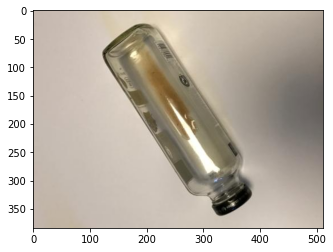

In [9]:
# see sample image
random_row = random.randint(0, len(df)-1)
sample = df.iloc[random_row]
randomimage = tf.keras.utils.load_img(base_path + "/" +sample['filename'])
print(sample['filename'], categories[sample['category']])

plt.imshow(randomimage)

In [10]:
#Create Model
import keras.applications.mobilenet_v2 as mobilenetv2 #pretrained model with 53 hidden layers

mobilenetv2_layer = mobilenetv2.MobileNetV2(include_top = False, input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS),
 weights = 'C:/Users/aakas/Desktop/programs/NNs/mobileweights.h5')

# We don't want to train the imported weights
mobilenetv2_layer.trainable = False

#base
model = Sequential()
model.add(keras.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))

#create a custom layer to apply the preprocessing
def mobilenetv2_preprocessing(img):
  return mobilenetv2.preprocess_input(img)

model.add(Lambda(mobilenetv2_preprocessing))

model.add(mobilenetv2_layer)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(len(categories), activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model.summary()

In [11]:
#uses the early stopping mechanism to shorten run times
early_stop = EarlyStopping(patience = 2, verbose = 1, monitor='val_categorical_accuracy' , mode='max', min_delta=0.001, restore_best_weights = True)
callbacks = [early_stop] #stores the best model weights here

In [12]:
#Change the categories from numbers to names
df["category"] = df["category"].replace(categories) 

# We first split the data into two sets and then split the validate_df to two sets
train_df, validate_df = train_test_split(df, test_size=0.2)
validate_df, test_df = train_test_split(validate_df, test_size=0.5)

#reset index drops the duplicate index after splitting
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print('train size = ', total_train , 'validate size = ', total_validate, 'test size = ', test_df.shape[0])

train size =  3720 validate size =  465 test size =  465


In [13]:
batch_size=100 #test the optimal batch size

train_datagen = image.ImageDataGenerator()
#create a generator to read images from the directory for training
train_generator = train_datagen.flow_from_dataframe(train_df, base_path, x_col='filename', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical',  batch_size=batch_size)

Found 3720 validated image filenames belonging to 9 classes.


In [14]:
validation_datagen = image.ImageDataGenerator()
#create a generator to read images from the directory for validation
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    base_path, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 465 validated image filenames belonging to 9 classes.


In [15]:
EPOCHS = 10#usually doesn't go past 9 epochs due to consistent accuracy plateau
history = model.fit( #we use generators so that the model can produce the data one at a time, not all can fit at once
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
37/37 [==============================] - 145s 4s/step - loss: 1.1954 - categorical_accuracy: 0.6301 - val_loss: 0.5068 - val_categorical_accuracy: 0.8775
Epoch 2/10
37/37 [==============================] - 99s 3s/step - loss: 0.4053 - categorical_accuracy: 0.8890 - val_loss: 0.3488 - val_categorical_accuracy: 0.9000
Epoch 3/10
37/37 [==============================] - 81s 2s/step - loss: 0.2967 - categorical_accuracy: 0.9163 - val_loss: 0.2888 - val_categorical_accuracy: 0.9200
Epoch 4/10
37/37 [==============================] - 91s 2s/step - loss: 0.2423 - categorical_accuracy: 0.9343 - val_loss: 0.2831 - val_categorical_accuracy: 0.9125
Epoch 5/10
37/37 [==============================] - 97s 3s/step - loss: 0.2030 - categorical_accuracy: 0.9442 - val_loss: 0.2631 - val_categorical_accuracy: 0.9225
Epoch 6/10
37/37 [==============================] - 97s 3s/step - loss: 0.1749 - categorical_accuracy: 0.9533 - val_loss: 0.2591 - val_categorical_accuracy: 0.9225
Epoch 7/10
37/3

In [18]:
test_datagen = image.ImageDataGenerator()
#create a generator to read images from the directory for testing
test_generator = test_datagen.flow_from_dataframe(
    dataframe= test_df,
    directory=base_path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=1,
    shuffle=False 
)

Found 465 validated image filenames belonging to 9 classes.


In [19]:
filenames = test_generator.filenames
nb_samples = len(filenames)#used for sample length

_, accuracy = model.evaluate(test_generator)#evalutato

print('Accuracy on test set = ',  round((accuracy * 100),2 ), '% ') #general accuracy hovers around 93#

465/465 [==============================] - 25s 53ms/step - loss: 0.2220 - categorical_accuracy: 0.9376
Accuracy on test set =  93.76 % 


In [20]:
#dictionary mapping category number and class name
gen_label_map = test_generator.class_indices #use indices of test generator
gen_label_map = dict((v,k) for k,v in gen_label_map.items()) #
print(gen_label_map)

{0: 'biological', 1: 'clothes', 2: 'general', 3: 'glass', 4: 'metal', 5: 'paper', 6: 'plastic', 7: 'shoes', 8: 'trash'}


In [21]:
# get the model's predictions for the test set
preds = model.predict(test_generator, nb_samples)

# Get the category with the highest predicted probability, the prediction is only the category's number and not name
preds = preds.argmax(1)

# Convert the predicted category's number to name 
preds = [gen_label_map[item] for item in preds]

# Convert the pandas dataframe to a numpy matrix
labels = test_df['category'].to_numpy()

#create report
print(classification_report(labels, preds))

465/465 [==============================] - 21s 43ms/step
              precision    recall  f1-score   support

  biological       1.00      0.96      0.98        56
     clothes       1.00      0.94      0.97        72
     general       1.00      0.88      0.94        26
       glass       0.79      0.91      0.85        45
       metal       0.94      0.92      0.93        52
       paper       0.95      1.00      0.97        53
     plastic       0.85      0.78      0.81        45
       shoes       0.94      1.00      0.97        61
       trash       0.96      0.96      0.96        55

    accuracy                           0.94       465
   macro avg       0.94      0.93      0.93       465
weighted avg       0.94      0.94      0.94       465



In [33]:
#csv of descriptive additional features
info = pd.read_csv("C:/Users/aakas/Desktop/programs/NNs/dict.csv")
info

,category,flammability,toxicity,reusability,recyclability,best mode of disposal,contact,Visit
0,biological,medium,high,low,high,Compost,Karnataka State Pollution Control Board,https://kspcb.karnataka.gov.in/waste-managemen...
1,paper,high,low,medium,high,Recycle,Paper Recycling Companies:,https://www.justdial.com/Bangalore/Waste-Paper...
2,metal,high,medium,medium,high,Recycle,Metal Recycling/Scrap Yards,https://www.scrapmonster.com/companies/scrap-m...
3,clothes,high,low,high,medium,Donate,Charities,https://sadsindia.org
4,general,medium,medium,low,low,General Disposal,BBMP,https://bbmp.gov.in
5,trash,medium,medium,low,medium,General Disposal,BBMP / Management Facilities,https://www.google.com/search?q=trash%20recycl...
6,shoes,low,low,high,low,Donate,Charities,https://sadsindia.org
7,plastic,high,medium,high,high,Recycle,Recyclers,https://kspcb.karnataka.gov.in/sites/default/f...
8,glass,low,low,medium,low,Segregated Disposal,Specific Glass Disposal Organization,https://www.environmental-expert.com/waste-rec...


In [54]:
###TESTING
#load the image
my_image = load_img('C:/Users/aakas/Desktop/programs/NNs/garbage_classification/biological/biological418.jpg', target_size=(224, 224))
img_path = "C:/Users/aakas/Pictures/Camera Roll/WIN_20221111_13_54_42_Pro.jpg"
with open(img_path, 'rb') as src:
    copy = im(src)

#preprocess the image
my_image = img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0) 
my_image = preprocess_input(my_image)


#make the prediction
prediction = model.predict(my_image)
prediction=[np.round(x) for x in prediction]
for i in prediction:
    print(gen_label_map[i.argmax()].title())
    query = gen_label_map[i.argmax()]
    q1= query + " Waste"
    results = wikipedia.summary(q1, 2)
    print("According to Wikipedia:")
    print(results)

#Additional Features   
print("Flammability: ", info.loc[info['category'] == query, 'flammability'].item())
print("Toxicity: ", info.loc[info['category'] == query, 'toxicity'].item())
print("Reusability: ", info.loc[info['category'] == query, 'reusability'].item())
print("Recyclability: ", info.loc[info['category'] == query, 'recyclability'].item())
print("Best Way to Dispose: ", info.loc[info['category'] == query, 'best mode of disposal'].item())
print("Contact For Immediate Action: ", info.loc[info['category'] == query, 'contact'].item())
print("For More Information: ", info.loc[info['category'] == query, 'Visit'].item())

#Geolocation Services
geocoder = Nominatim(user_agent = 'SpyTrash')
q = "info"
if copy.has_exif:    
    TheDegreeValue, TheMinuteValue, TheSecondValue = copy.gps_latitude
    TheLatitudeValue=TheDegreeValue+(TheMinuteValue/60)+(TheSecondValue/3600)
    TheDegreeValue, TheMinuteValue, TheSecondValue = copy.gps_longitude
    TheLongitudeValue=TheDegreeValue+(TheMinuteValue/60)+(TheSecondValue/3600)
    coord = (TheLatitudeValue, TheLongitudeValue)
    print("Location: ", geocoder.reverse(coord))
else:
    print("No GPS Data")



1/1 [==============================] - 1s 793ms/step
biological
According to Wikipedia:
Green waste, also known as "biological waste", is any organic waste that can be composted. It is most usually composed of refuse from gardens such as grass clippings or leaves, and domestic or industrial kitchen wastes.
Flammability:  medium
Toxicity:  high
Reusability:  low
Recyclability:  high
Best Way to Dispose:  Compost
Contact For Immediate Action:  Karnataka State Pollution Control Board
For More Information:  https://kspcb.karnataka.gov.in/waste-management/biomedical-waste#
Location:  REVA University, Bagalur Road, Jakkuru, Yelahanka Zone, Bengaluru, Bangalore North, Bangalore Urban, Karnataka, 562149, India


In [28]:
#Save model to be used in front end connection';'lmnb n
model.save("model123.h5")